## Analise Exploratoria sobre qualidade de Vinhos

### Summary


- *Fixed acidity:* Indica a quantidade de ácido tartárico no vinho e é medida em g/dm 3 .
- *Volatile acidity:* Indica a quantidade de ácido acético no vinho. É medido em g/dm 3 .
- *Citric acid:* Indica a quantidade de ácido cítrico do vinho. Também é medido em g/dm 3 .
- *Residual sugar:* Indica a quantidade de açúcar que resta no vinho após o término da fermentação. Também é medido em g/dm 3 .
- *Free sulfur dioxide:* Mede a quantidade de dióxido de enxofre (SO 2 ) na forma livre. Também é medido em g/dm 3 .
- *Total sulfur dioxide:* Mede a quantidade total de SO 2 no vinho. Este produto químico funciona como um agente antioxidante e antimicrobiano.
- *Density:* Indica a densidade do vinho e é medida em g/dm 3 .
- *pH:* Indica o valor do pH do vinho. A faixa de valor está entre 0 e 14,0, que indica acidez muito alta, e 14 indica acidez básica.
- *Sulphates:* Indica a quantidade de sulfato de potássio no vinho. Também é medido em g/dm 3 .
- *Alcohol:* Indica o teor alcoólico do vinho.
- *Quality:* Indica a qualidade do vinho, que varia de 1 a 10. Aqui, quanto maior o valor, melhor é o vinho.

#### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.stats import skew
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
     

In [3]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df_red.iloc[100:110]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.9972,3.40,0.61,10.2,6
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6
103,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.9960,3.33,0.48,9.4,5
105,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.9969,3.46,0.79,9.3,5
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.9976,3.37,0.80,9.6,6
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.9969,3.21,0.69,9.3,5


In [6]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Analisando Vinho Tinto

<Axes: xlabel='quality', ylabel='count'>

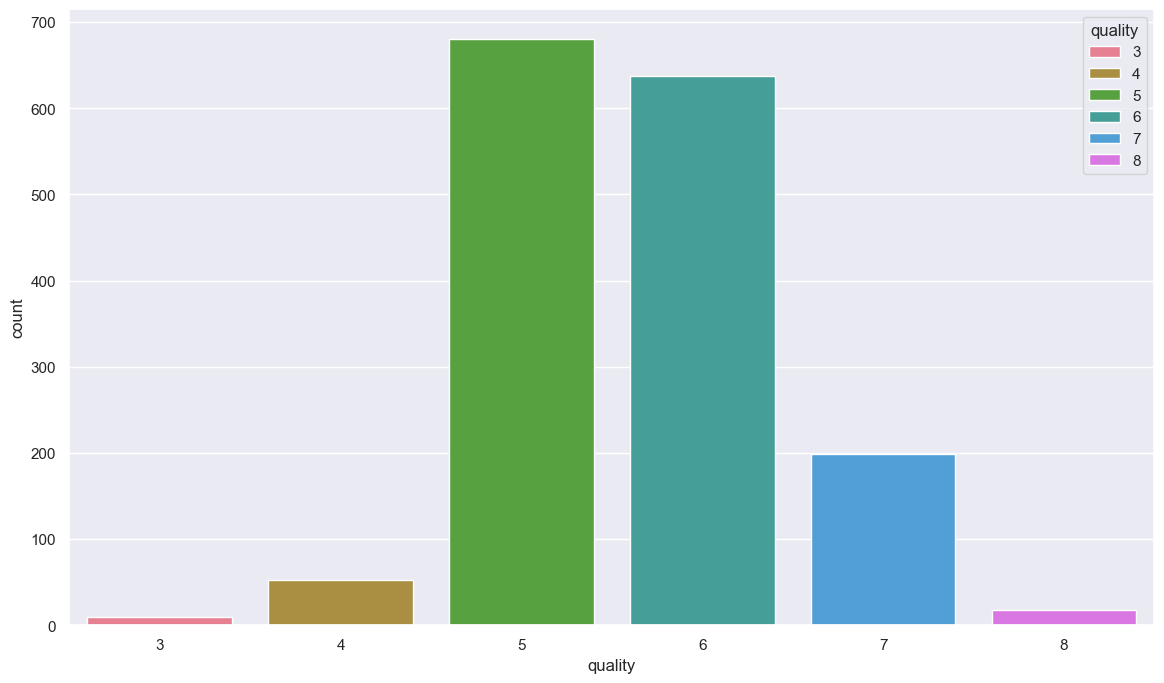

In [8]:
sns.set(rc={'figure.figsize': (14, 8)})
palette = sns.color_palette("husl", len(df_red['quality'].unique()))
sns.countplot(x='quality', hue='quality', data=df_red, palette=palette, dodge=False)


<Axes: >

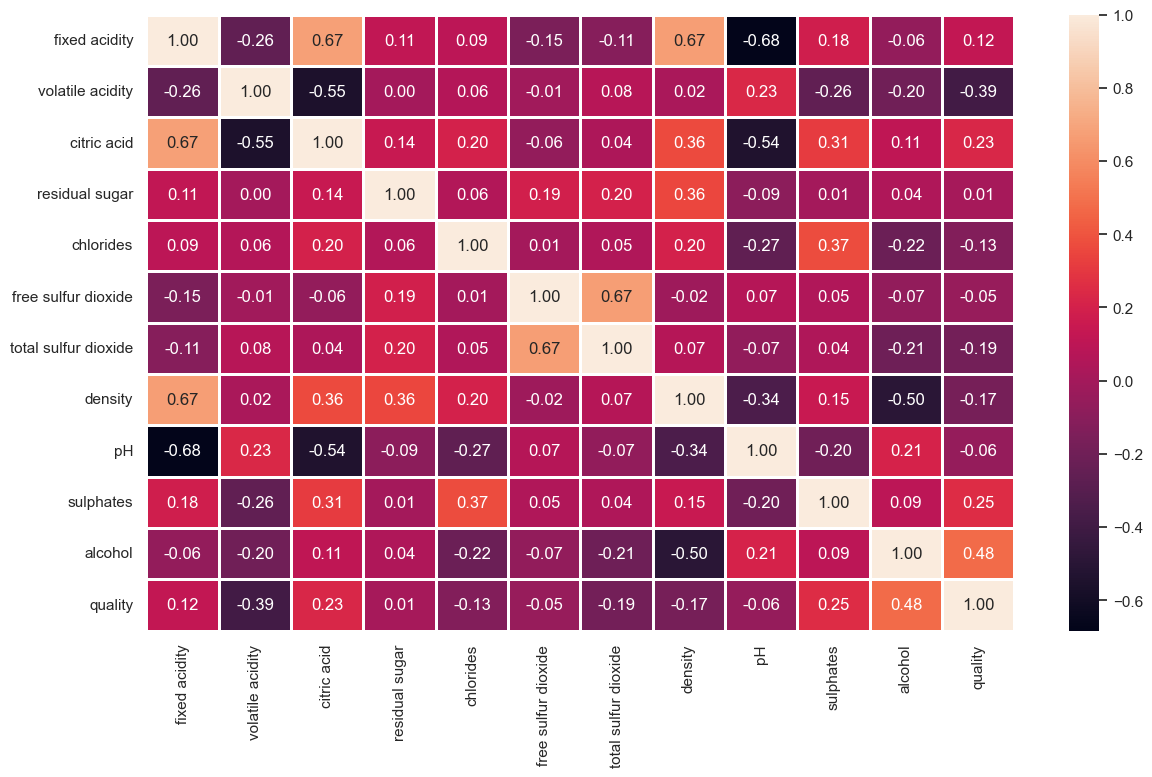

In [9]:
sns.heatmap(df_red.corr(), annot=True, fmt='.2f', linewidths=2)

- A coluna de qualidade tem correlação positiva com álcool, sulfatos, açúcar residual, ácido cítrico e acidez fixa
- O álcool está positivamente correlacionado com a qualidade do vinho tinto.
- O álcool tem uma correlação positiva fraca com o valor do pH.
- O ácido cítrico e a densidade têm uma forte correlação positiva com a acidez fixa.
- O pH tem correlação negativa com densidade, acidez fixa, ácido cítrico e sulfatos.

Uma coluna tem uma correlação positiva perfeita consigo mesma. Por exemplo, a qualidade do vinho tem uma correlação positiva consigo mesma. Esta é a razão pela qual todos os elementos diagonais têm uma correlação positiva de 1.

- *como a concentração de álcool é distribuída em relação à qualidade do vinho tinto?*

<Axes: xlabel='alcohol', ylabel='Count'>

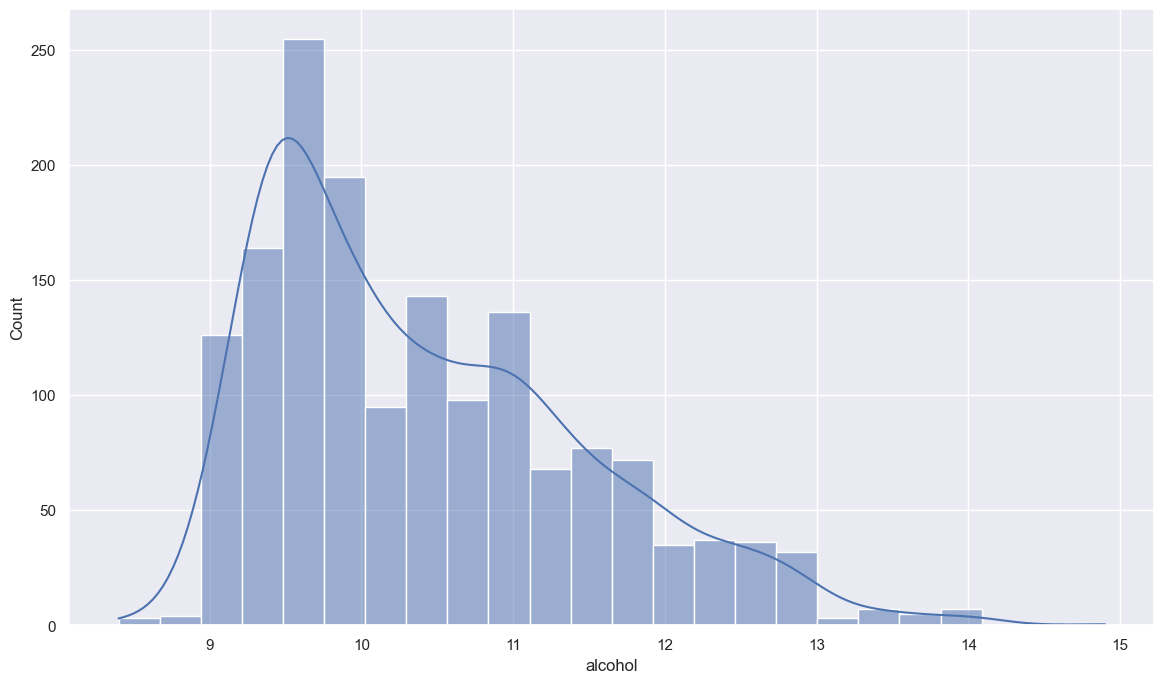

In [10]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.histplot(df_red['alcohol'], kde=True)

In [11]:
skew(df_red['alcohol'])

np.float64(0.8600210646566755)

<Axes: xlabel='quality', ylabel='alcohol'>

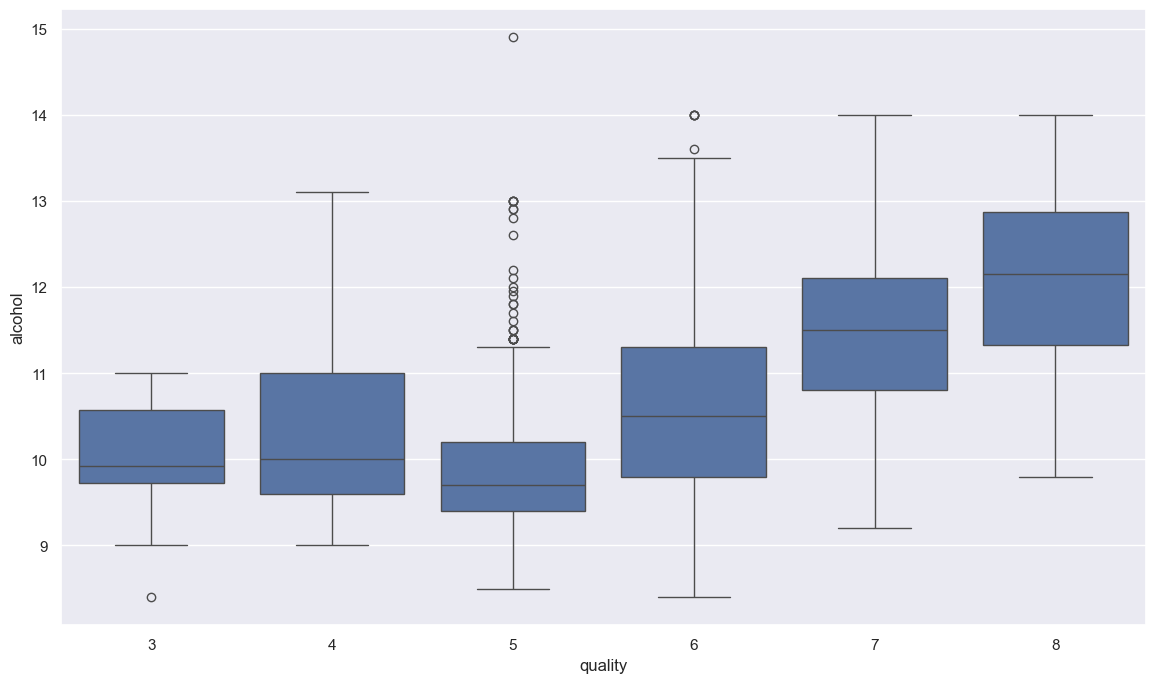

In [12]:
sns.boxplot(x='quality', y='alcohol', data = df_red)

<Axes: xlabel='quality', ylabel='alcohol'>

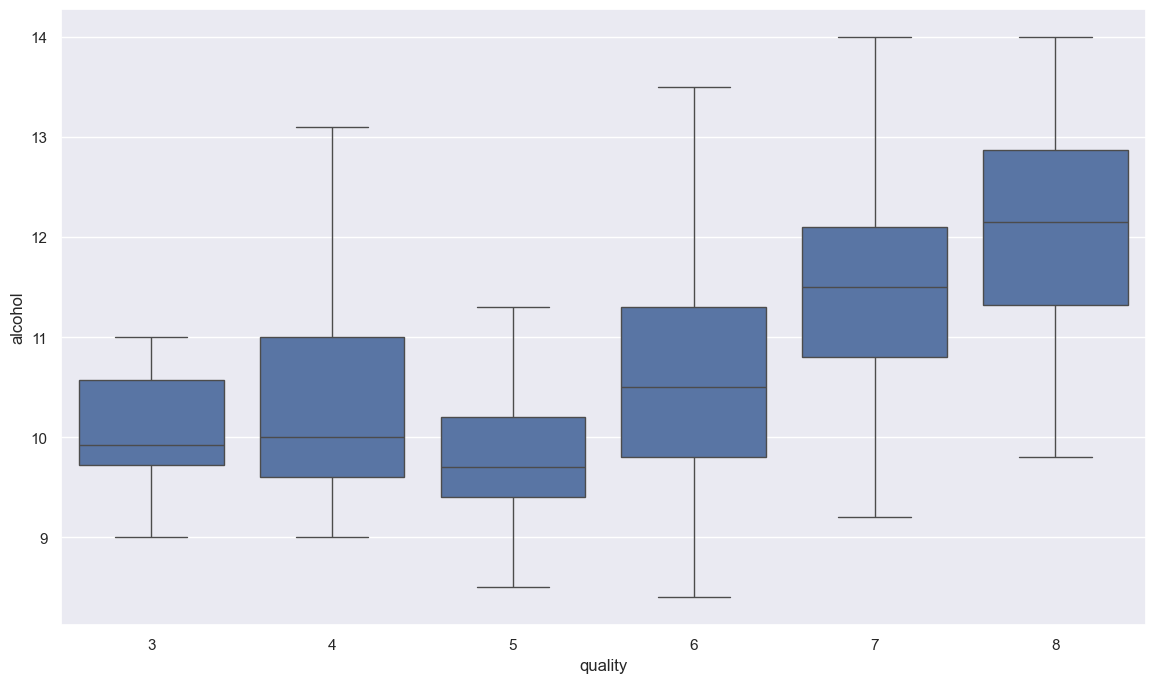

In [13]:
sns.boxplot(x='quality', y='alcohol', data = df_red, showfliers=False)

- à medida que a qualidade do vinho aumenta, também aumenta a concentração de álcool.

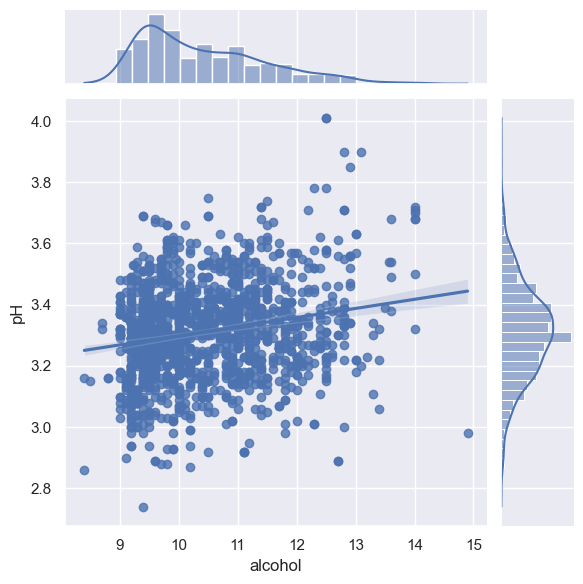

In [14]:
sns.jointplot(x='alcohol',y='pH',data=df_red, kind='reg')

- o álcool está fracamente relacionado positivamente aos valores de pH. 

#### Usando a regressão de Pearson para quantificar a correlação

In [15]:
def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Correlation entre {} e {} é {}".format(column1, column2, pearson_corr))
  print("P-value desta  correlation é {}".format(p_value))

In [16]:
get_correlation('alcohol','pH', df_red)

Correlation entre alcohol e pH é 0.20563250850549838
P-value desta  correlation é 9.964497741457687e-17


## Analisando o Vinho Branco

In [17]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [18]:
print("white mean = ",df_white["quality"].mean())
print("red mean =",df_red["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [19]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean
     

,color,mean_quality
0,red,5.636023
1,white,5.877909


In [20]:
# adicionando novas categorias
df_white['wine_category'] = 'white'
df_red['wine_category'] = 'red'

In [21]:
print('RED WINE: List of "quality"', sorted(df_red['quality'].unique()))
print('WHITE WINE: List of "quality"', sorted(df_white['quality'].unique()))

RED WINE: List of "quality" [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
WHITE WINE: List of "quality" [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


### Convertendo em uma coluna categorica

In [22]:
df_red['quality_label'] = df_red['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_red['quality_label'] = pd.Categorical(df_red['quality_label'], categories=['low', 'medium', 'high'])

df_white['quality_label'] = df_white['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_white['quality_label'] = pd.Categorical(df_white['quality_label'], categories=['low', 'medium', 'high'])

In [23]:
print(df_white['quality_label'].value_counts())
df_red['quality_label'].value_counts()
     

quality_label
medium    3078
low       1640
high       180
Name: count, dtype: int64


quality_label
medium    837
low       744
high       18
Name: count, dtype: int64

### Concatenando dataframes

In [24]:
df_wines = pd.concat([df_red, df_white])

In [25]:
#embaralhando as linhas para que os pontos de dados sejam aleatorios
df_wines = df_wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
df_wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,medium
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,medium
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,low
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,white,medium


### Agrupando colunas

In [26]:

subset_attr = ['alcohol', 'density', 'pH', 'quality']

low = round(df_wines[df_wines['quality_label'] == 'low'][subset_attr].describe(), 2)
medium = round(df_wines[df_wines['quality_label'] == 'medium'][subset_attr].describe(), 2)
high = round(df_wines[df_wines['quality_label'] == 'high'][subset_attr].describe(), 2)

pd.concat([low, medium, high], axis=1, 
          keys=['👎 Low Quality Wine', 
                '👌 Medium Quality Wine', 
                '👍 High Quality Wine'])

👎 Low Quality Wine                            👌 Medium Quality Wine  \
                 alcohol  density       pH  quality               alcohol   
count            2384.00  2384.00  2384.00  2384.00               3915.00   
mean                9.87     1.00     3.21     4.88                 10.81   
std                 0.84     0.00     0.16     0.36                  1.20   
min                 8.00     0.99     2.74     3.00                  8.40   
25%                 9.30     0.99     3.11     5.00                  9.80   
50%                 9.60     1.00     3.20     5.00                 10.80   
75%                10.40     1.00     3.31     5.00                 11.70   
max                14.90     1.00     3.90     5.00                 14.20   

                                 👍 High Quality Wine                          
       density       pH  quality             alcohol density      pH quality  
count  3915.00  3915.00  3915.00              198.00  198.00  198.00  198.00  
mean      0.99     3.22     6.28               11.69    0.99    3.23    8.03  
std       0.00     0.16     0.45                1.27    0.00    0.16    0.16  
min       0.99     2.72     6.00                8.50    0.99    2.88    8.00  
25%       0.99     3.11     6.00               11.00    0.99    3.13    8.00  
50%       0.99     3.21     6.00               12.00    0.99    3.23    8.00  
75%       1.00     3.33     7.00               12.60    0.99    3.33    8.00  
max       1.04     4.01     7.00               14.00    1.00    3.72    9.00

#### Fazendo uma analise Univariada

AttributeError: module 'matplotlib' has no attribute 'tight_layout'

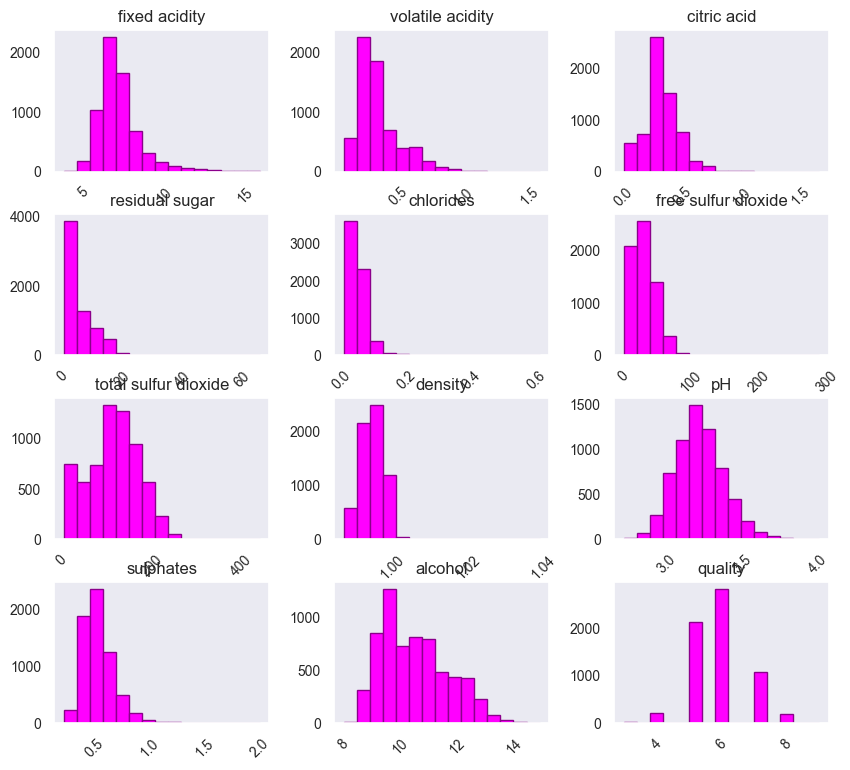

In [27]:
fig = df_wines.hist(bins=15, color='fuchsia', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

In [29]:

df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


Text(0.5, 0.98, 'Combined Wine Attributes and their Correlation Heatmap')

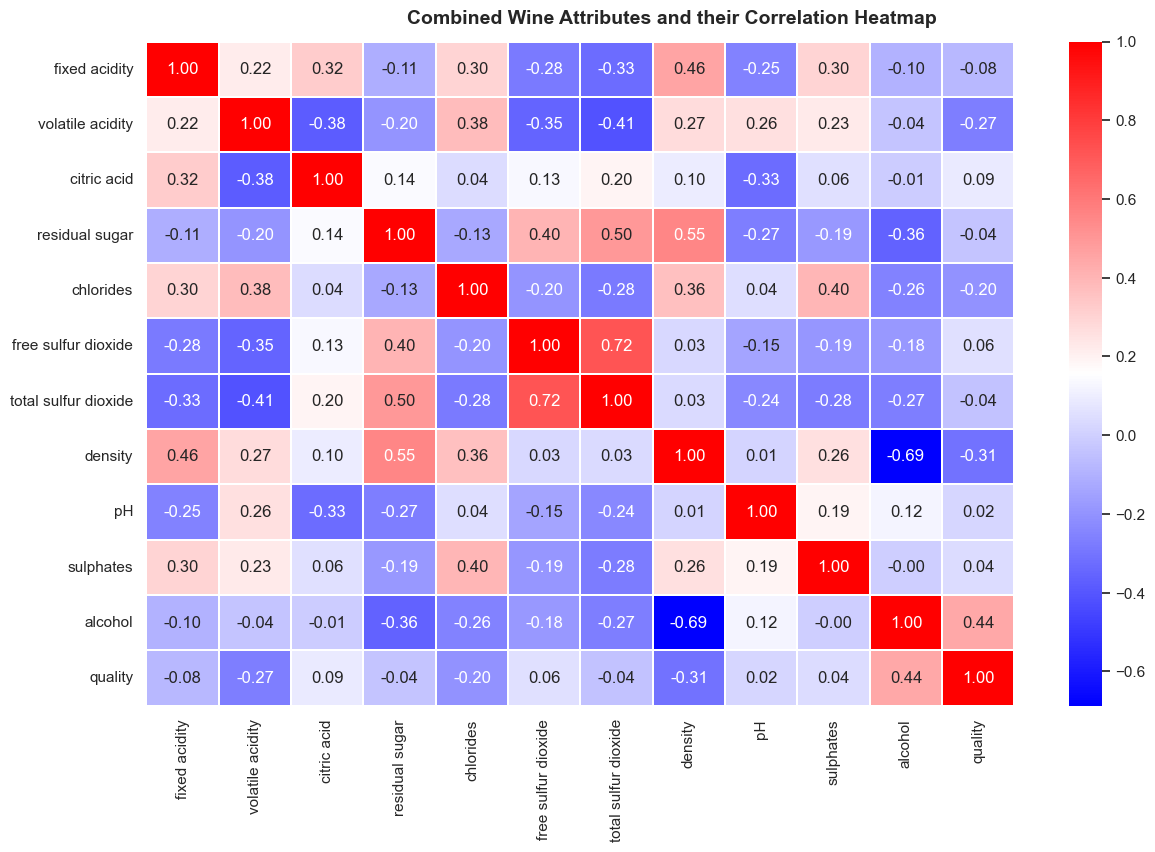

In [42]:
numerical_df = df_wines.select_dtypes(include=['float64', 'int64'])

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
hm = sns.heatmap(numerical_df.corr(), 
                 ax=ax,           
                 cmap="bwr", 
                 annot=True, 
                 fmt='.2f',       
                 linewidths=.05)

fig.subplots_adjust(top=0.94)
fig.suptitle('Combined Wine Attributes and their Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

### Atributos categoricos Discretos

<Axes: xlabel='quality', ylabel='count'>

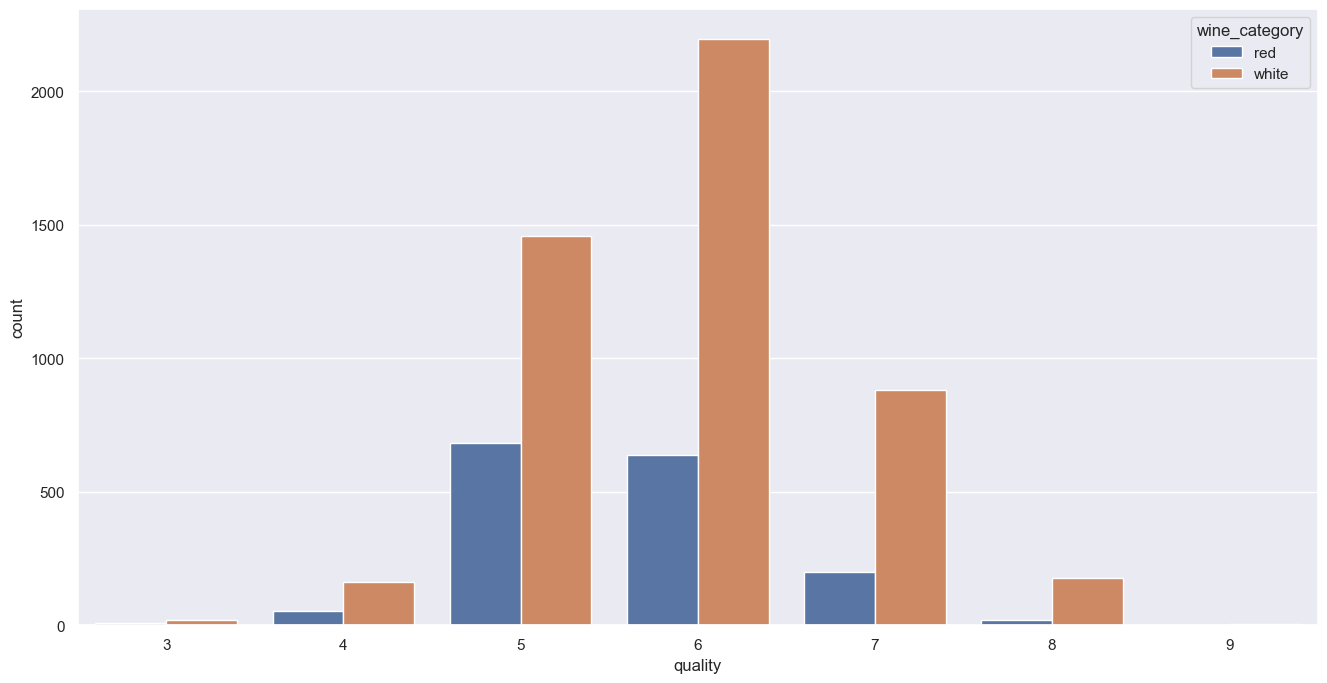

In [44]:
fig = plt.figure(figsize=(16, 8))

sns.countplot(data=df_wines, x="quality", hue="wine_category")
     

### Visualizão 3D

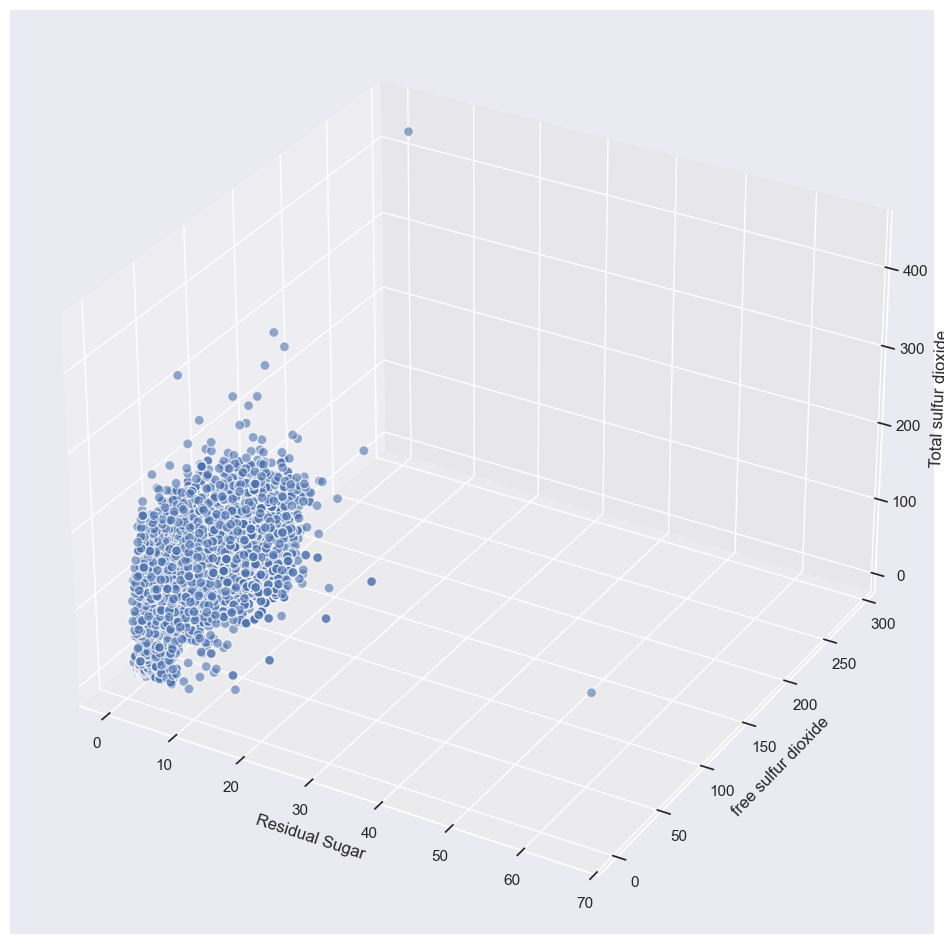

In [46]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

xscale = df_wines['residual sugar']
yscale = df_wines['free sulfur dioxide']
zscale = df_wines['total sulfur dioxide']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('free sulfur dioxide')
ax.set_zlabel('Total sulfur dioxide')

plt.show()

Text(0.5, 1.05, 'Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide')

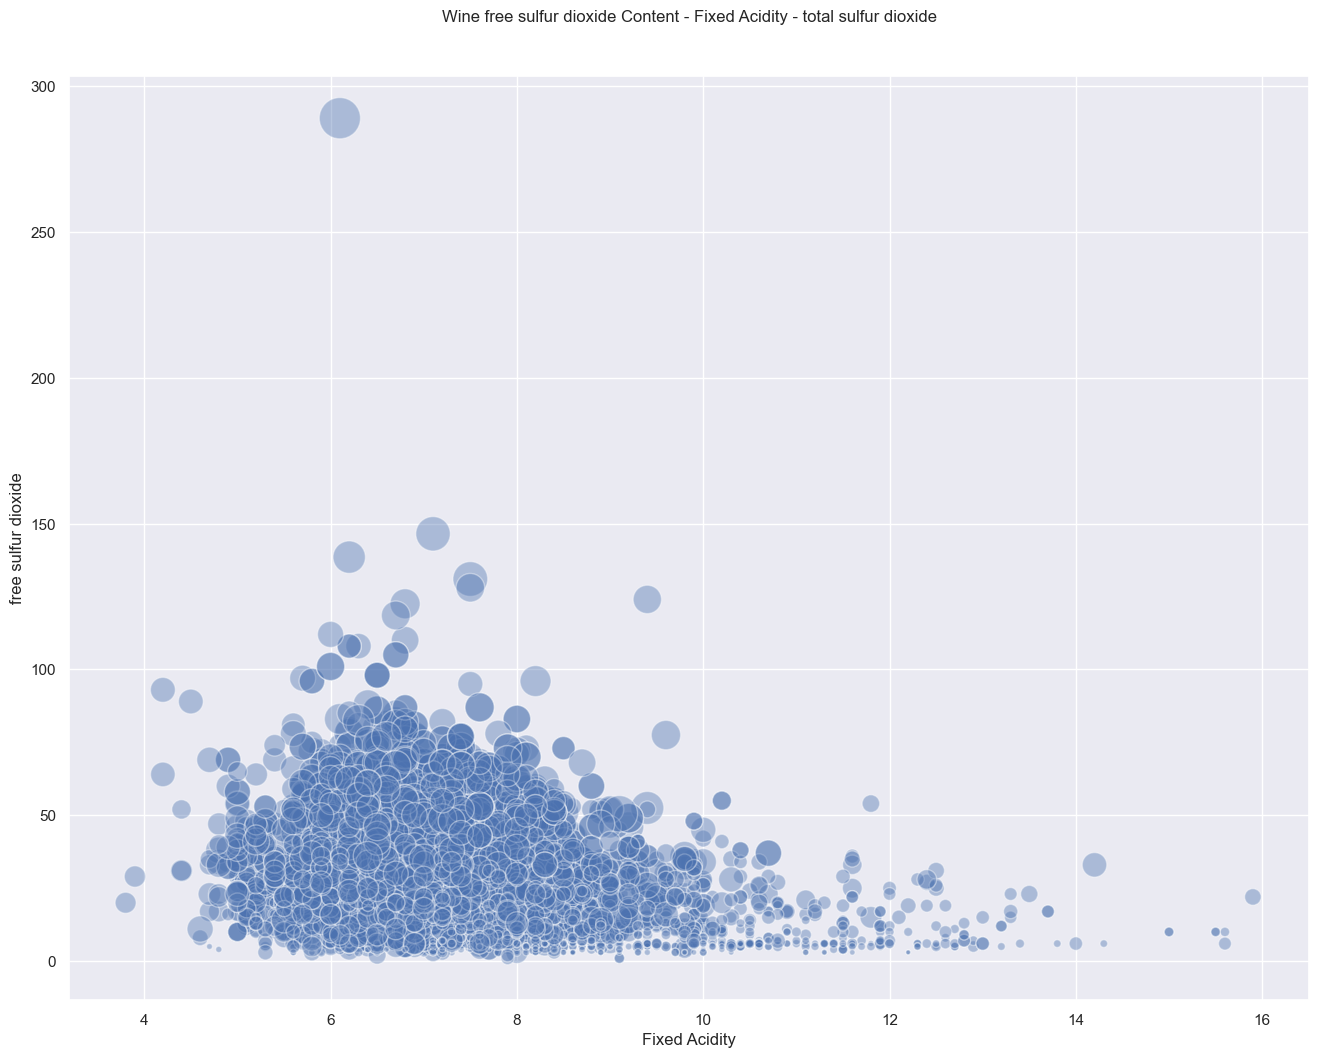

In [47]:
fig = plt.figure(figsize=(16, 12))

plt.scatter(x = df_wines['fixed acidity'], 
            y = df_wines['free sulfur dioxide'], 
            s = df_wines['total sulfur dioxide'] * 2,
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('free sulfur dioxide')
plt.title('Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide', y=1.05)

- O tamanho dos círculos denota a terceira variável. Neste caso, quanto maior for o raio do círculo, maior será o valor do açúcar residual

In [48]:

df_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_category',
       'quality_label'],
      dtype='object')

## Desenvolvimento e avaliação de modelo

In [54]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [56]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

-  usaremos o dataframe combinado A seguir, codificaremos os valores categóricos da coluna . Codificaremos os valores para que todos os valores baixos sejam alterados para 0, os valores médios sejam alterados para 1 e os valores altos sejam alterados para 2.quality_label

In [57]:
label_quality = LabelEncoder()

df_wines['quality_label'] = label_quality.fit_transform(df_wines['quality_label'])

In [59]:
df_wines.tail(10)
     

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
6487,6.1,0.22,0.46,1.80,0.160,34.0,74.0,0.98840,3.19,0.33,13.4,6,white,2
6488,10.3,0.50,0.42,2.00,0.069,21.0,51.0,0.99820,3.16,0.72,11.5,6,red,2
6489,6.4,0.31,0.53,8.80,0.057,36.0,221.0,0.99642,3.17,0.44,9.1,5,white,1
6490,5.9,0.26,0.24,2.40,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,5,white,1
6491,8.0,0.34,0.49,9.00,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,8,white,0
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,1
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,2
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,1
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,1
6496,7.2,0.62,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5,red,1


- vamos dividir nosso conjunto de dados em um conjunto de treinamento e um conjunto de teste. Usaremos 70% do conjunto de dados como conjunto de treinamento e os 30% restantes como conjunto de teste:

In [60]:
x_train,x_test,y_train,y_test=train_test_split(df_wines.drop(['quality','wine_category'],axis=1),df_wines['quality_label'],test_size=0.30,random_state=42)

models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

- Usamos o train_test_split()método fornecido pela sklearnbiblioteca

- Não precisamos mais das colunas qualitye wine_category, então as eliminamos
- Consideramos 30% dos dados como conjunto de teste. Podemos fazer isso simplesmente passando o test_size = 0.30argumento.

In [61]:
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'RandomForestClassifier',
             'DecisionTree',
             'GradientBoostingClassifier',
             'GaussianNB']

acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.9641025641025641,
  0.9846153846153847,
  0.6051282051282051,
  0.6912820512820513,
  1.0,
  1.0,
  1.0,
  1.0]}

- Criando um loop em cada modelo, criando um modelo e avaliando a precisão

In [62]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
7,GaussianNB,1.000000
6,GradientBoostingClassifier,1.000000
5,DecisionTree,1.000000
4,RandomForestClassifier,1.000000
1,LinearSVM,0.984615
0,LogisticRegression,0.964103
3,KNearestNeighbors,0.691282
2,rbfSVM,0.605128


- Observe que a conversão da qualidade em um conjunto de dados categórico nos proporcionou maior precisão. A maioria dos algoritmos deu 100% de precisão

<Axes: xlabel='Accuracy', ylabel='Modelling Algorithm'>

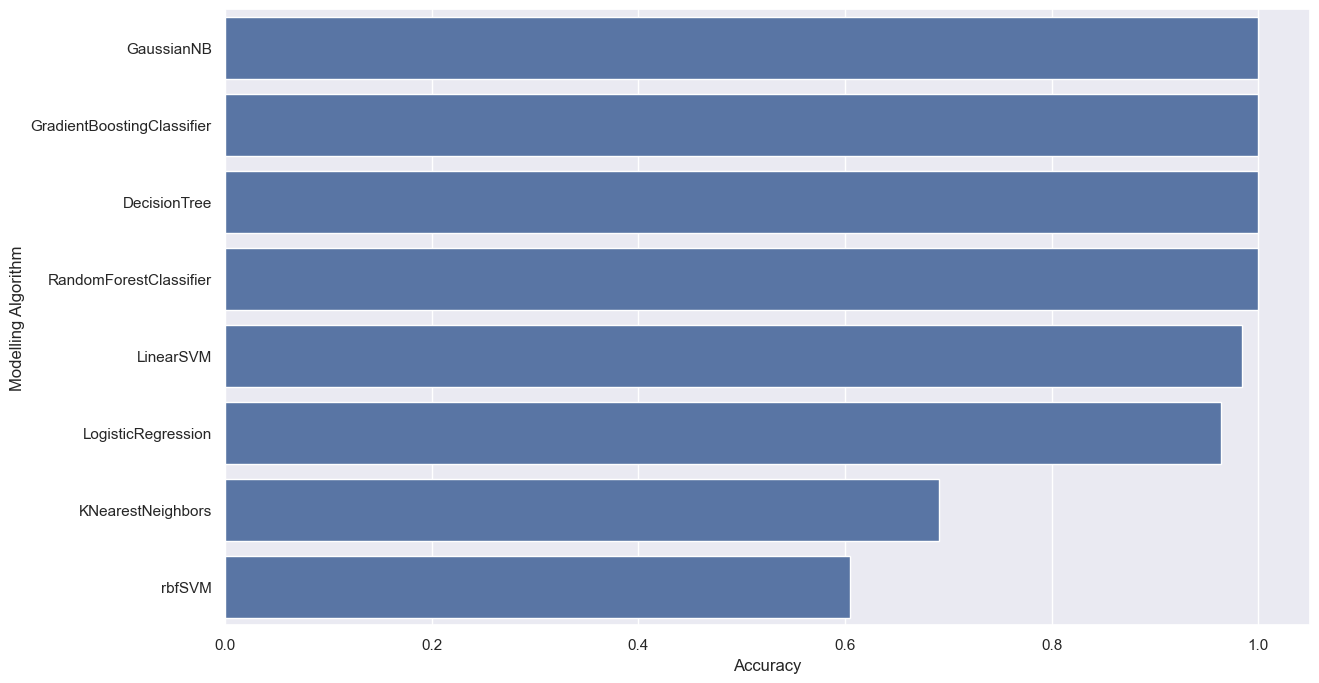

In [70]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

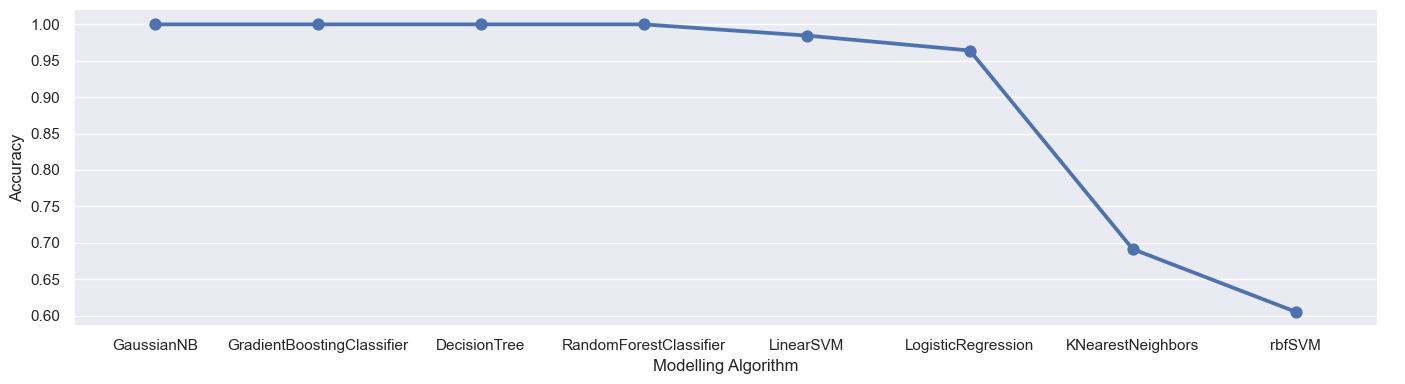

In [72]:
sns.catplot(x='Modelling Algorithm', y='Accuracy', data=acc_table, kind='point', height=4, aspect=3.5)


###  A random forest, the decision tree, the gradient boosting classifier, and the Gaussian Naive Bayes classifier  forneceram 100% de precisão.